In [ ]:
# Выполнил: Фомин Олег Витальевич; Группа: ФН11-53Б.
# Домашнее задание 2-3; Интегральное уравнение Фредгольма 2-го рода.

n = 53 # Номер группы.
N = 13 # Номер студента в списке группы.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Специфический вывод матрицы для LaTex:

def print_matrix(matrix, left_cols=None, right_cols=None):
    if len(matrix.shape) == 2:
        if left_cols is None:
            for i in range(matrix.shape[0]):
                row = ''
                for j in range(matrix.shape[1]):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row = row[:-2]
                row += '\\\\'
                print(row)

        else:
            for i in range(matrix.shape[0]):
                row = ''
                for j in range(left_cols):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row += '\ldots & '
                for j in range(matrix.shape[1] - right_cols, matrix.shape[1]):
                    kek = matrix[i][j]
                    if kek > 0:
                        row += str((round(kek, 5))) + ' & '
                    else:
                        row += str((round(kek, 4))) + ' & '
                row = row[:-2]
                row += '\\\\'
                print(row)

    elif len(matrix.shape) == 1:
        row = ''
        for i in range(matrix.shape[0]):
            kek = matrix[i]
            if kek > 0:
                row += str((round(kek, 5))) + ' \\\\ '
            else:
                row += str((round(kek, 4))) + ' \\\\ '
        print(row)

In [ ]:
# Определим пределы интегрирования:
a = 0
b = (N + 7) / N
print(f"Нижний и верхний концы интегрирования: {a}, {b}")


m = 20 # количество узлов в квадратурной форме;
lambd = 1 / (1 + (n - 45) / 2) # определение лямбды в дискретной форме;

h = (b - a) / m # определение шага

def K_line_element(s, t):
    return t * (2 * b - s)

# Определим мн-во s: мн-во интегрирования и соотв. центральные элементы мн-ва:
s = np.linspace(a, b, m + 1)
print("\nСоотвествующие центральные элементы мн-ва s:")
s_center = (s[1:] + s[:-1]) / 2
print_matrix(np.array([float(f"{val:.3}") for val in s_center]))

# Определим дискретный вид уравнения:
y = [((N + 3) / N) * (val**2 + (n - 53) / 2) for val in s_center]

# y = [b*(val**3+val**2+4) for val in s_center]
print('\nЛямбда:', lambd)

print('\nЗначение центральных элементов мн-ва S:')
print_matrix(s_center)

Нижний и верхний концы интегрирования: 0, 1.5384615384615385

Соотвествующие центральные элементы мн-ва s:
0.0385 \\ 0.115 \\ 0.192 \\ 0.269 \\ 0.346 \\ 0.423 \\ 0.5 \\ 0.577 \\ 0.654 \\ 0.731 \\ 0.808 \\ 0.885 \\ 0.962 \\ 1.04 \\ 1.12 \\ 1.19 \\ 1.27 \\ 1.35 \\ 1.42 \\ 1.5 \\ 

Лямбда: 0.2

Значение центральных элементов мн-ва S:
0.03846 \\ 0.11538 \\ 0.19231 \\ 0.26923 \\ 0.34615 \\ 0.42308 \\ 0.5 \\ 0.57692 \\ 0.65385 \\ 0.73077 \\ 0.80769 \\ 0.88462 \\ 0.96154 \\ 1.03846 \\ 1.11538 \\ 1.19231 \\ 1.26923 \\ 1.34615 \\ 1.42308 \\ 1.5 \\ 


In [ ]:
print("Составим матрицу K(s, tau):\n")
K = np.zeros((m, m))
for i in range(m):
    for j in range(i + 1):
        K[i,j] = float(f"{K_line_element(s_center[i], s_center[j]):.5}")
        K[j,i] = float(f"{K[i,j]:.3}")

print_matrix(K, 4, 4)

Составим матрицу K(s, tau):

0.117 & 0.114 & 0.111 & 0.108 & \ldots & 0.0695 & 0.0666 & 0.0636 & 0.0607 \\
0.11391 & 0.342 & 0.333 & 0.324 & \ldots & 0.209 & 0.2 & 0.191 & 0.182 \\
0.11095 & 0.33284 & 0.555 & 0.54 & \ldots & 0.348 & 0.333 & 0.318 & 0.303 \\
0.10799 & 0.32396 & 0.53994 & 0.756 & \ldots & 0.487 & 0.466 & 0.445 & 0.425 \\
0.10503 & 0.31509 & 0.52515 & 0.73521 & \ldots & 0.626 & 0.599 & 0.572 & 0.546 \\
0.10207 & 0.30621 & 0.51036 & 0.7145 & \ldots & 0.765 & 0.732 & 0.7 & 0.667 \\
0.09911 & 0.29734 & 0.49556 & 0.69379 & \ldots & 0.904 & 0.865 & 0.827 & 0.788 \\
0.09615 & 0.28846 & 0.48077 & 0.67308 & \ldots & 1.04 & 0.999 & 0.954 & 0.91 \\
0.0932 & 0.27959 & 0.46598 & 0.65237 & \ldots & 1.18 & 1.13 & 1.08 & 1.03 \\
0.09024 & 0.27071 & 0.45118 & 0.63166 & \ldots & 1.32 & 1.26 & 1.21 & 1.15 \\
0.08728 & 0.26183 & 0.43639 & 0.61095 & \ldots & 1.46 & 1.4 & 1.34 & 1.27 \\
0.08432 & 0.25296 & 0.4216 & 0.59024 & \ldots & 1.6 & 1.53 & 1.46 & 1.4 \\
0.08136 & 0.24408 & 0.4068 & 0.5

In [ ]:
print("Составим матрицу F:\n")
F = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        d = 1 if i == j else 0
        F[i, j] = float(f'{(d - lambd * K[i, j] * h):.5}')
print_matrix(F, 4, 4)

Составим матрицу F:

0.9982 & -0.0018 & -0.0017 & -0.0017 & \ldots & -0.0011 & -0.001 & -0.001 & -0.0009 \\
-0.0018 & 0.99474 & -0.0051 & -0.005 & \ldots & -0.0032 & -0.0031 & -0.0029 & -0.0028 \\
-0.0017 & -0.0051 & 0.99146 & -0.0083 & \ldots & -0.0054 & -0.0051 & -0.0049 & -0.0047 \\
-0.0017 & -0.005 & -0.0083 & 0.98837 & \ldots & -0.0075 & -0.0072 & -0.0068 & -0.0065 \\
-0.0016 & -0.0048 & -0.0081 & -0.0113 & \ldots & -0.0096 & -0.0092 & -0.0088 & -0.0084 \\
-0.0016 & -0.0047 & -0.0079 & -0.011 & \ldots & -0.0118 & -0.0113 & -0.0108 & -0.0103 \\
-0.0015 & -0.0046 & -0.0076 & -0.0107 & \ldots & -0.0139 & -0.0133 & -0.0127 & -0.0121 \\
-0.0015 & -0.0044 & -0.0074 & -0.0104 & \ldots & -0.016 & -0.0154 & -0.0147 & -0.014 \\
-0.0014 & -0.0043 & -0.0072 & -0.01 & \ldots & -0.0182 & -0.0174 & -0.0166 & -0.0158 \\
-0.0014 & -0.0042 & -0.0069 & -0.0097 & \ldots & -0.0203 & -0.0194 & -0.0186 & -0.0177 \\
-0.0013 & -0.004 & -0.0067 & -0.0094 & \ldots & -0.0225 & -0.0215 & -0.0206 & -0.0195 \\


In [ ]:
print("Обратная матрица F:\n")
F_inv = np.linalg.inv(F)
print_matrix(F_inv, 4, 4)

Обратная матрица F:

1.00185 & 0.00191 & 0.00196 & 0.002 & \ldots & 0.00186 & 0.00179 & 0.00173 & 0.00165 \\
0.00191 & 1.00572 & 0.00586 & 0.00599 & \ldots & 0.00557 & 0.00538 & 0.00518 & 0.00495 \\
0.00196 & 0.00586 & 1.00975 & 0.00995 & \ldots & 0.00925 & 0.00894 & 0.0086 & 0.00822 \\
0.002 & 0.00598 & 0.00995 & 1.01388 & \ldots & 0.01291 & 0.01247 & 0.01199 & 0.01149 \\
0.00203 & 0.00609 & 0.01012 & 0.01412 & \ldots & 0.01651 & 0.01595 & 0.01534 & 0.01469 \\
0.00206 & 0.00617 & 0.01025 & 0.0143 & \ldots & 0.02006 & 0.01938 & 0.01865 & 0.01784 \\
0.00208 & 0.00622 & 0.01035 & 0.01444 & \ldots & 0.02353 & 0.02273 & 0.02187 & 0.02092 \\
0.00209 & 0.00626 & 0.01041 & 0.01452 & \ldots & 0.02686 & 0.02601 & 0.02502 & 0.02394 \\
0.00209 & 0.00627 & 0.01042 & 0.01454 & \ldots & 0.03015 & 0.02914 & 0.02804 & 0.02683 \\
0.00209 & 0.00626 & 0.01041 & 0.01452 & \ldots & 0.03336 & 0.03218 & 0.03105 & 0.02966 \\
0.00208 & 0.00623 & 0.01036 & 0.01444 & \ldots & 0.03643 & 0.03525 & 0.03394 & 0.0323

In [ ]:
# Вектор-y
print_matrix(np.array(y))

0.00182 \\ 0.01639 \\ 0.04552 \\ 0.08921 \\ 0.14747 \\ 0.2203 \\ 0.30769 \\ 0.40965 \\ 0.52617 \\ 0.65726 \\ 0.80291 \\ 0.96313 \\ 1.13792 \\ 1.32726 \\ 1.53118 \\ 1.74966 \\ 1.9827 \\ 2.23031 \\ 2.49249 \\ 2.76923 \\ 


In [ ]:
# Решаем СЛАУ
x_vect = np.linalg.solve(F, y)
print_matrix(x_vect)

0.03837 \\ 0.12591 \\ 0.22752 \\ 0.34293 \\ 0.47156 \\ 0.61322 \\ 0.76698 \\ 0.93253 \\ 1.10846 \\ 1.29647 \\ 1.4939 \\ 1.70055 \\ 1.91497 \\ 2.13809 \\ 2.36624 \\ 2.60135 \\ 2.84132 \\ 3.08575 \\ 3.33293 \\ 3.58368 \\ 


[0.56516 3.31463 8.74119]
[1.31869 3.19357 5.18613]
Коэффициенты фурье разложения: [1.50281907650721, -0.758014909976281, 0.242880012504566]



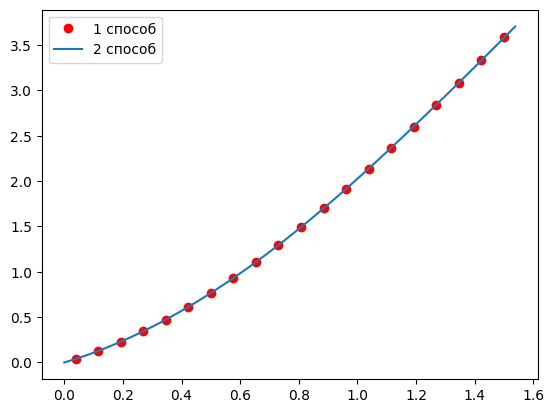

In [ ]:
# Задаём параметры из аналитического решения уравнения Фредгольма 2-го рода:

import sympy as sy
from sympy.solvers import solve

x = sy.Symbol("x")
tangenses = [2.02875783811043, 4.91318043943488, 7.97866571241324]
l = []
for t in tangenses:
   l.append(t**2 / (b**3 * 2))

print(np.round(l, 5))


# Значения собственной функции при различных корнях lambda
def fi(l_i):
    return np.sqrt(2 * b * l_i)

f_i = [fi(l_i) for l_i in l]

print(np.round(f_i, 5))

# Считаем коэффициенты Фурье в разложении функции по ортогональному базису:
def f_top(k, x):
    return (N + 3) / N * (x**2 + (n - 53) / 2) * sy.sin(k * x)

def f_bot(k, x):
    return (sy.sin(k * x))**2


alpha = []
for k in f_i:
    top = sy.integrate(f_top(k, x), (x, a, b))
    bot = sy.integrate(f_bot(k, x), (x, a, b))
    alpha.append(top/bot)

print(f'Коэффициенты фурье разложения: {alpha}\n')

def answ(x):
    return (N + 3) / N * (x** 2 + (n - 53) / 2) + lambd * (alpha[0]/(l[0] - lambd) * np.sin(f_i[0]*x) + alpha[1]/(l[1]-lambd) * np.sin(f_i[1]*x) + alpha[2]/(l[2] - lambd) * np.sin(f_i[2]*x))

graph_x = np.linspace(a, b, 100)

plt.plot(s_center, x_vect , 'ro', label='1 способ')
plt.plot(graph_x, answ(graph_x), label='2 способ')
plt.scatter(s_center, answ(s_center), s=20, marker='o')
plt.legend()
plt.savefig('graph.png')
plt.show()

In [ ]:
koefts_fi = []
koefts_fi.append(alpha[0]/(l[0]-lambd))
koefts_fi.append(alpha[1]/(l[1]-lambd))
koefts_fi.append(alpha[2]/(l[2]-lambd))
print(koefts_fi)

[4.11552198368767, -0.243372112221725, 0.0284363165002406]


In [ ]:
import pandas as pd

df = pd.DataFrame({'x': s_center, 'anal': x_vect})
df['pribl'] = [answ(val) for val in s_center]
df['error'] = df['anal'] - df['pribl']

max_error = abs(df['error']).max()
print(max_error)
df

0.00446309319745808


,x,anal,pribl,error
0,0.038462,0.038374,0.0387130341815473,-0.000339517007487994
1,0.115385,0.125909,0.126815189923135,-0.000906524901749722
2,0.192308,0.227524,0.228749665641959,-0.00122573546040949
3,0.269231,0.342931,0.344060355333987,-0.00112955951857302
4,0.346154,0.471563,0.472329681200132,-0.000766759052962918
5,0.423077,0.613216,0.613175474093403,4.07847292929198e-5
6,0.500000,0.766979,0.766233832818185,0.000744751603060978
7,0.576923,0.932525,0.931129529293299,0.00139594374345131
8,0.653846,1.108455,1.10743833812064,0.00101706270916324
9,0.730769,1.296474,1.29464786547513,0.00182608647442128


In [ ]:
last_table = []
for i in range(len(s_center)):
    last_table.append([s_center[i], x_vect[i], answ(s_center[i]), abs(x_vect[i]-answ(s_center[i]))])
last_table = np.array(last_table)
print_matrix(last_table)

0.03846 & 0.03837 & 0.03871 & 0.00034 \\
0.11538 & 0.12591 & 0.12682 & 0.00091 \\
0.19231 & 0.22752 & 0.22875 & 0.00123 \\
0.26923 & 0.34293 & 0.34406 & 0.00113 \\
0.34615 & 0.47156 & 0.47233 & 0.00077 \\
0.42308 & 0.61322 & 0.61318 & 4.e-5 \\
0.5 & 0.76698 & 0.76623 & 0.00074 \\
0.57692 & 0.93253 & 0.93113 & 0.00140 \\
0.65385 & 1.10846 & 1.10744 & 0.00102 \\
0.73077 & 1.29647 & 1.29465 & 0.00183 \\
0.80769 & 1.4939 & 1.49212 & 0.00178 \\
0.88462 & 1.70055 & 1.69910 & 0.00146 \\
0.96154 & 1.91497 & 1.91465 & 0.00032 \\
1.03846 & 2.13809 & 2.13775 & 0.00033 \\
1.11538 & 2.36624 & 2.36732 & 0.00108 \\
1.19231 & 2.60135 & 2.60227 & 0.00093 \\
1.26923 & 2.84132 & 2.84161 & 0.00029 \\
1.34615 & 3.08575 & 3.08452 & 0.00123 \\
1.42308 & 3.33293 & 3.33046 & 0.00248 \\
1.5 & 3.58368 & 3.57922 & 0.00446 \\
